In [333]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import tree

In [334]:
# get data
preprocessed_data = pd.read_csv("train.csv")

In [335]:
preprocessed_data.shape

(891, 12)

In [336]:
preprocessed_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [337]:
# Nan values and extra info are problems
preprocessed_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [338]:
def process_data(data):
    # delete shit columns
    result = data.drop(labels=['Name', 'Ticket', 'PassengerId', 'Cabin', 'Embarked'], axis=1) \
                 .rename(columns={"Sex" : "Male"})
    
    def to_int(x: bool): return 1 if x else 0

    # transform to int boolean columns
    result['Male'] = result['Male'].apply(lambda x: 1 if x == "male" else 0)
    
    # fix Nan data
    mean_age = result.mean()['Age']
    result['Age'] = result['Age'].fillna(mean_age)
    
    mean_fare = result.mean()['Fare']
    result['Fare'] = result['Fare'].fillna(mean_fare)
    
    return result

In [339]:
train_data = process_data(preprocessed_data)

In [340]:
# Check if Nan problem is fixed
train_data.isna().sum()

Survived    0
Pclass      0
Male        0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [341]:
# Try to choose correctly a ml model
train_data.corr()

,Survived,Pclass,Male,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Male,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


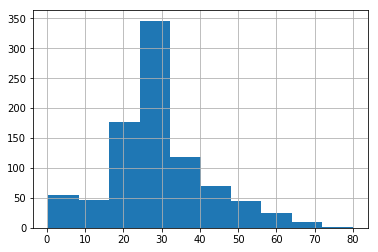

In [342]:
train_data.Age.hist()

In [343]:
train_data.dtypes

Survived      int64
Pclass        int64
Male          int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

/home/q3an/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/q3an/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/q3an/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/q3an/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


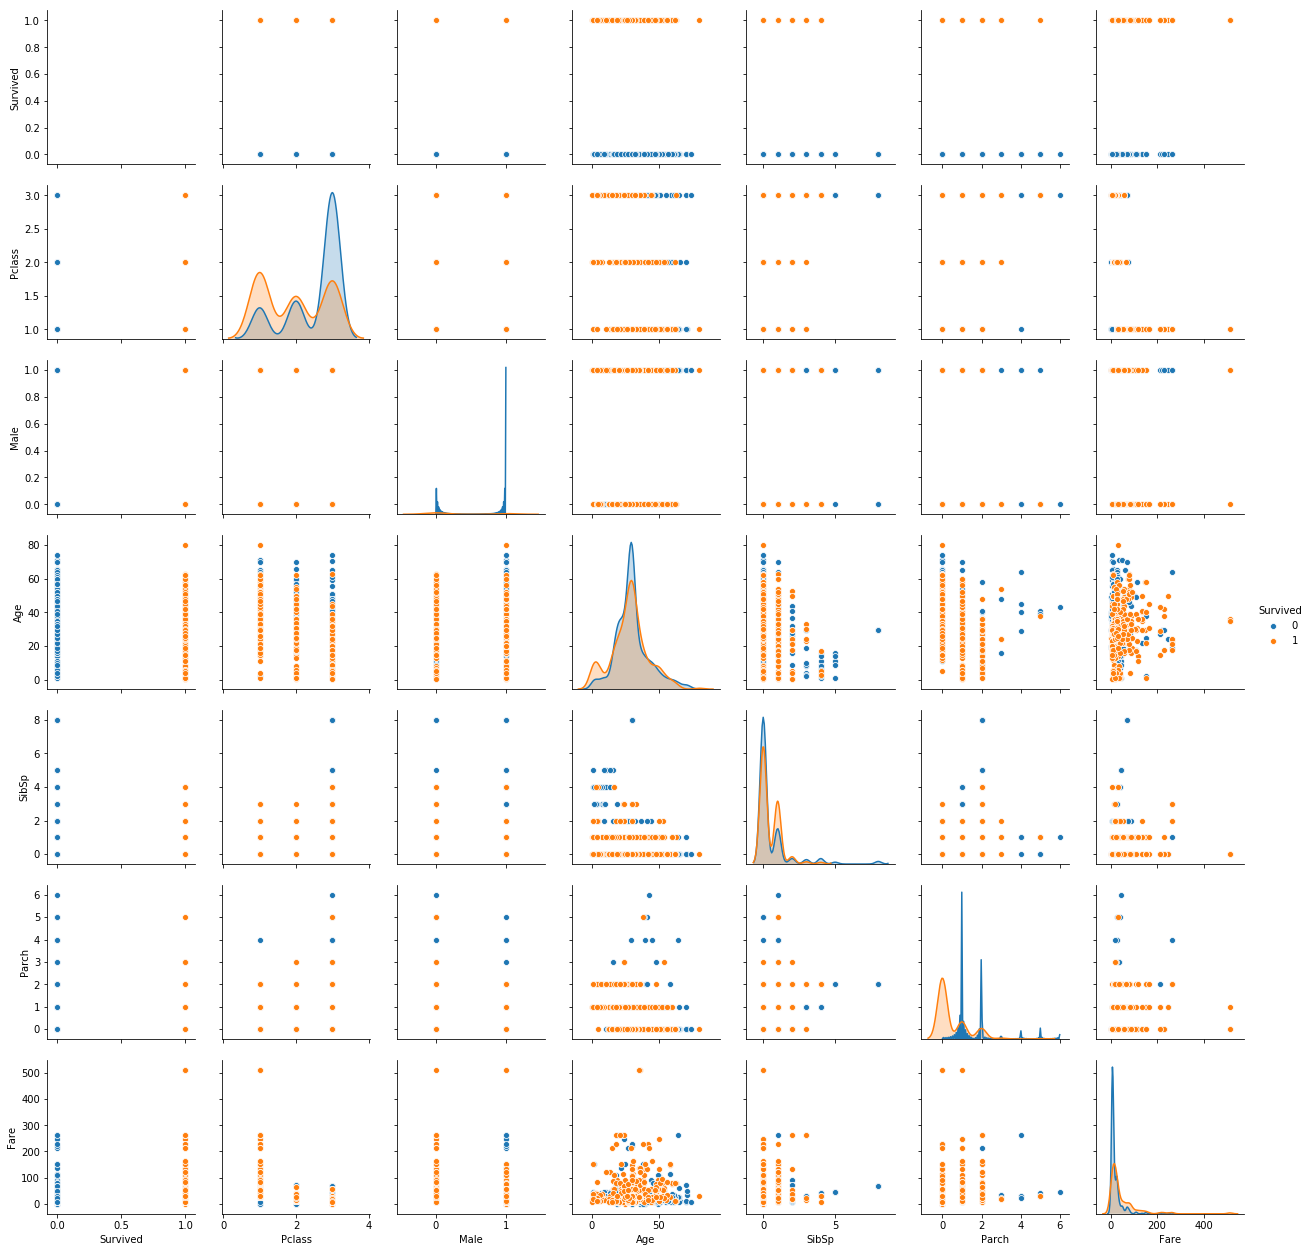

In [344]:
sns.pairplot(train_data, hue="Survived")

In [345]:
train_data.shape

(891, 7)

In [346]:
# Train decision tree, cause linear regression isn't the best variant, k means too
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(train_data.drop(labels=['Survived'], axis=1), train_data['Survived'])

In [347]:
test_data = pd.read_csv("test.csv")

In [348]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [349]:
processed_test_data = process_data(test_data)

In [350]:
processed_test_data.isna().sum()

Pclass    0
Male      0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [351]:
predicted_survived = pd.Series(classifier.predict(processed_test_data))

In [352]:
submission = pd.DataFrame({"PassengerId" : test_data["PassengerId"], "Survived" : predicted_survived})

In [353]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [354]:
submission.to_csv("submission.csv", index=False)